[[ 96  94  95 ...  83  80  81]
 [ 94  96 101 ...  76  77  74]
 [ 98 100 106 ...  78  82  76]
 ...
 [ 10   8   9 ... 207 207 208]
 [  9   8  10 ... 212 213 214]
 [  6   6  10 ... 210 210 211]]


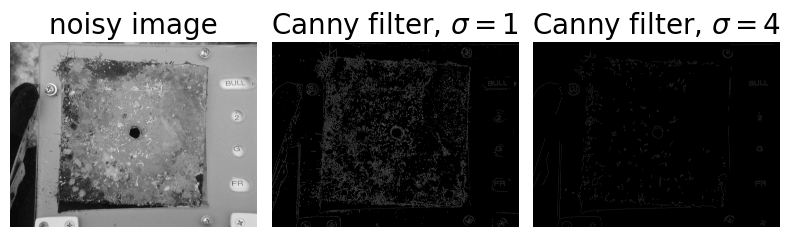

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import convex_hull_image
from skimage.util import random_noise
from skimage import feature
from skimage.io import imread

from PIL import Image

# get image and place in np array
import cv2
image = cv2.imread('DairyBull_G1_Jan2017.jpg', cv2.IMREAD_GRAYSCALE)

#row,col = img.size
#image = np.zeros((row, col))
#pix = img.load()

#for i in range(row):
#    for f in range(col):
#        print((i, f))
#        image[row, col] = pix[row, col]

# Compute the Canny filter for two values of sigma

print(image)

edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=4)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=4$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

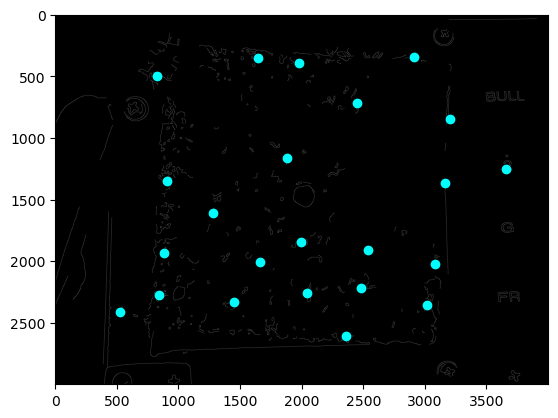

In [77]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = edges2

coords = corner_peaks(corner_harris(image), min_distance=300, threshold_rel=.3)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
plt.show()

In [78]:
minx = min(coords[:, 1])
maxx = max(coords[:, 1])
miny = min(coords[:, 0])
maxy = max(coords[:, 0])

print("" + str(minx) + " " + str(maxx) + " " + str(miny) + " " + str(maxy))

523 3660 343 2605


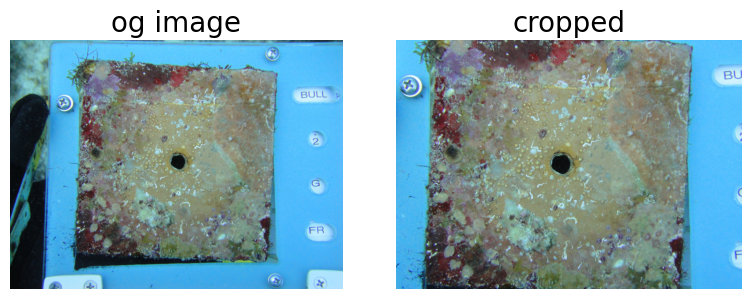

In [82]:
yuh = Image.open('DairyBull_G1_Jan2017.jpg')


nuh = yuh.crop((minx, miny, maxx, maxy))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax[0].imshow(yuh)
ax[0].set_title('og image', fontsize=20)

ax[1].imshow(nuh)
ax[1].set_title('cropped', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()